In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode (connected=True)
import plotly.graph_objs as go

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [29]:
# Firstly,import the data.
data=pd.read_csv("../input/data.csv")
# Looking at the first four rows of the data. 
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
# And also I look at the last four rows.
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [31]:
# When I look at the table, I saw that id and last column is not important for me so I drop these into my data.
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.head()
# Now, data is looking good :).

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
# looking the column names.
data.columns
# we see that column names are in the perfect form. So that we do not need to change formats.

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [33]:
# Now, start to explore data.
data.shape
# we have 31 columns and 569 rows.

(569, 31)

In [34]:
data.info()
# Moreover, data has one object and thirty float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [35]:
# Now,look at is there any "na" in the data
data.isna().any()
# We see that there is no "na" in the data

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [36]:
# Let's make second check for "na"
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [37]:
data.describe()
# In there, we see that variables are in different ranges. Moreover, some variables have an outliers in first look.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


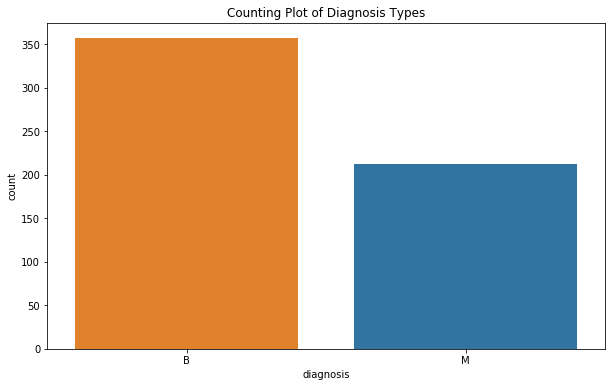

In [38]:
# In data, we have only one object. Now, we look at the graph of diagnosis
f,ax=plt.subplots(figsize=(10,6))
sb.countplot(data.diagnosis)
plt.gca().invert_xaxis()
plt.title("Counting Plot of Diagnosis Types")
plt.show()
# We see that most of the diagnosis are benign.(b=benign,m=malignant)

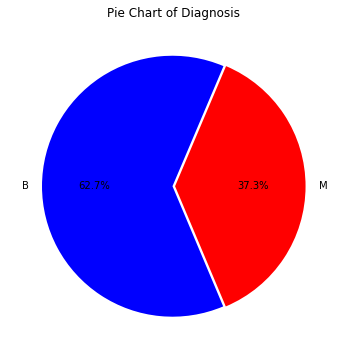

In [39]:
# We also look at the pie chart to looking percentage of diagnosis.
plt.figure(figsize=(10,6))
plt.pie(data.diagnosis.value_counts().values,colors=("blue","red"),labels=data.diagnosis.value_counts().index
       ,explode=(0.01,0.01),autopct="%1.1f%%",startangle=67)
plt.title("Pie Chart of Diagnosis")
plt.show()
# We see that 62.7% of diagnosis are benign

In [40]:
# We can also show bar graph using the plotly.

trace=go.Bar(x=data.diagnosis.value_counts().index,
             y=data.diagnosis.value_counts().values,
             name="diagnosis",
             marker=dict(color="rgba(25,14,25,.8)",
             line=dict(color="rgb(0,0,0)",width=1.5)),
             text=data.diagnosis
             )
              
data1=[trace]     
        
layout1=dict(title="Bar Graph of Diagnosis",xaxis=dict(title="Diagnosis Type",ticklen=5,zeroline=False),
            yaxis=dict(title="Counts of Diagnosis",ticklen=5,zeroline=False))

fig=dict(data=data1,layout=layout1)
iplot(fig)

In [41]:
# We also look at the pie chart with plotly
trace=[go.Pie(labels=data.diagnosis.value_counts().index,values=data.diagnosis.value_counts().values
       ,hoverinfo="label+percent+value"
        ,hole=.5
      )]

layout2=dict(title="Pie Chart of Diagnosis")

iplot(trace,layout2)

In [42]:
# Now,we can make plotly then we procude with plotly plots.
# Before looking the describes of variable, we see that some of variables have an outlier or outliers. We can chech this information with box plots.
a=0
list1=[]
for i in data.columns[1:]:
    trace_a=go.Box(y=data.loc[:,i],name=i
                  )
    list1.append(trace_a)
    a=a+1

iplot(list1)


In [43]:
# Let's look at the some variables box_plots.
iplot(list1[5:13])
# In bottom graph, we see that variables values are more different than others.

In [44]:
# We cannot make a model with these values we need to normalize variables.
# Now,we make normalize the variables.
from sklearn import preprocessing
normalize_data=pd.DataFrame(preprocessing.normalize(data.iloc[:,1:]))
normalize_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,0.000035,0.000482,0.000399,0.003784,0.067580,0.000003,0.000022,0.000024,0.000007,0.000013,0.000003,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,0.000024,0.000229,0.000309,0.001432,0.031209,0.000002,0.000006,0.000008,0.000006,0.000006,0.000001,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,0.000029,0.000355,0.000374,0.002181,0.044731,0.000003,0.000019,0.000018,0.000010,0.000011,0.000002,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,0.000139,0.000708,0.001652,0.004925,0.038925,0.000013,0.000107,0.000081,0.000027,0.000085,0.000013,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,0.000029,0.000369,0.000381,0.002649,0.046002,0.000006,0.000012,0.000028,0.000009,0.000009,0.000002,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037


In [45]:
# I need to change the column names with their true names.
normalize_data.columns=[data.columns[1:]]
normalize_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,0.000035,0.000482,0.000399,0.003784,0.067580,0.000003,0.000022,0.000024,0.000007,0.000013,0.000003,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,0.000024,0.000229,0.000309,0.001432,0.031209,0.000002,0.000006,0.000008,0.000006,0.000006,0.000001,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,0.000029,0.000355,0.000374,0.002181,0.044731,0.000003,0.000019,0.000018,0.000010,0.000011,0.000002,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,0.000139,0.000708,0.001652,0.004925,0.038925,0.000013,0.000107,0.000081,0.000027,0.000085,0.000013,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,0.000029,0.000369,0.000381,0.002649,0.046002,0.000006,0.000012,0.000028,0.000009,0.000009,0.000002,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037


In [ ]:
# We normalize the variables. We can look at their correlations.
f,ax=plt.subplots(figsize=(22,10))
sb.heatmap(normalize_data.corr(),annot=True,linewidths=.3,fmt=".2f",ax=ax)
plt.show()
# In the graph we see that area_worst has a high correlation almost every variables.

In [ ]:
# Firstly,we made basic linear regression and predict the area_worst.
# To do that, we can use area_mean,radius_mean and perimeter_mean, because there are a high correlations with area_worst.
from sklearn.linear_model import LinearRegression
y=normalize_data.area_worst
x=normalize_data.loc[:,["area_mean","radius_mean","perimeter_mean"]]
lm=LinearRegression()
reg=lm.fit(x,y)
print("R^2 is :",reg.score(x,y))
# As we expected R^2 is very high that means we can explain the area_worst with area_mean,radius_mean and perimeter_mean.

In [ ]:
# We also need to look at variables correlations.
normalize_data.loc[:,["area_mean","radius_mean","perimeter_mean"]].corr()
#The variables correlations are too high so there is a multicollinearty in our model.

In [ ]:
#Now,let's classify the diagnosis with using logistic regression.But first
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
# To made a classification we need to add diagnosis. But first we need to change object 1 or 0 and after that concat with normalize_data.
binary_diagnosis=pd.DataFrame([1 if i=="B" else 0 for i in data.diagnosis],columns=["binary_diagnosis"])
new_data=pd.concat([binary_diagnosis,normalize_data],axis=1)
new_data.columns=[data.columns]
new_data.head()

In [ ]:
# We also need to split our data into 80% train and 20% test.
from sklearn.model_selection import train_test_split
x=new_data.iloc[:,1:]
y=new_data.diagnosis
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train.shape :",x_train.shape)
print("x_test.shape :",x_test.shape)
print("y_train.shape :",y_train.shape)
print("y_test.shape :",y_test.shape)

In [ ]:
# Let's fit the logistic regression.
lr.fit(x_train,y_train)
a=lr.predict(x_train).reshape(-1,1)
b=np.concatenate([a,y_train],axis=1)
combine_predict_actual=pd.DataFrame(b,columns=["Predict","Actual"])
print(combine_predict_actual.head(10))
print()
print("R^2 score :",lr.score(x_test,y_test))

# We see that our predictions give us almost same spliting with the actuals.
# Our logistic regression score is 78% that is also high R^2 score.
# However,we see that some predict values cannot same as actuals like fifth one.

In [ ]:
#Let's make another classification that is KNN.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
a=knn.predict(x_train).reshape(-1,1)
b=np.concatenate([a,y_train],axis=1)
combine_predict_actual=pd.DataFrame(b,columns=["Predict","Actual"])
print(combine_predict_actual.head(10))
print()
print('KNN (K=3) score is: ',knn.score(x_test,y_test))
# Now, we see that KNN predict the values better than logistic regression. 
# When logistic regression predict the fifth value wrong, KNN do not predict wrong the fifth value.
# We also see that KNN score is impressively high.

In [ ]:
# Still we use the k=3, let's find out the which k values give us a best classification rate.

neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# That graph show us the best k value is 10.

In [ ]:
# We find the best k values that is 10 then make our KNN with k=10.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)
a=knn.predict(x_train).reshape(-1,1)
b=np.concatenate([a,y_train],axis=1)
combine_predict_actual=pd.DataFrame(b,columns=["Predict","Actual"])
print(combine_predict_actual.head(10))
print()
print('KNN (K=3) score is: ',knn.score(x_test,y_test))

# Now,we find the best prediction result with using KNN and k=10.